# Comparing Different Clustering Algorithms

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

## Generate Toy Data

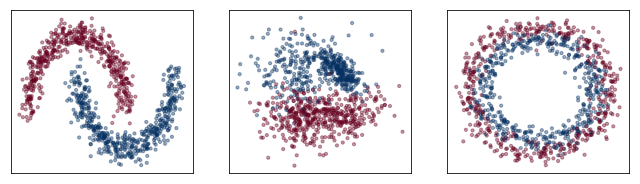

In [4]:
# Generate Samples
NOISE = 0.1
N_SAMPLES = 1000
RANDOM_STATE = 98105

data_list = [
    make_moons(noise=NOISE, n_samples=N_SAMPLES, random_state=RANDOM_STATE),
    make_classification(n_samples=N_SAMPLES, n_features=2, n_redundant=0, n_informative=2, random_state=RANDOM_STATE),
    make_circles(n_samples=N_SAMPLES, noise=NOISE, random_state=RANDOM_STATE),
]

def plot_data(X, y, ax):
    """
    Plot data X, y to a plot given (ax).
    """
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu, alpha=0.4, s=10)
    ax.set_xticks(())
    ax.set_yticks(())

# Plot Data
n = len(data_list)
plt.figure(figsize=(15,3))
for i in range(n):
    X, y = data_list[i]
    ax = plt.subplot(1,4,i+1)
    plot_data(X, y, ax)

##  C-Support Vector Classification

In [40]:
model = svm.SVC(gamma=3, C=2)

In [31]:
def create_meshgrid(X):
    h = 0.02
    x_min, x_max = X[:,0].min()-.5, X[:,0].max()+.5
    y_min, y_max = X[:,1].min()-.5, X[:,1].max()+.5
    xx = np.arange(x_min, x_max, h)
    yy = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xx,yy)
    return xx, yy, np.c_[xx.ravel(), yy.ravel()]


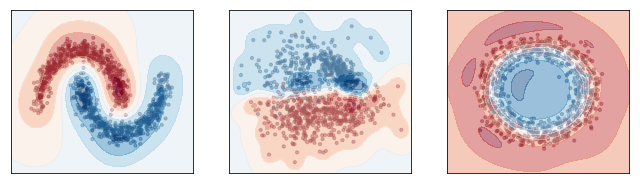

In [42]:
# Plot Data
n = len(data_list)
plt.figure(figsize=(15,3))
for i in range(n):
    X, y = data_list[i]
    ax = plt.subplot(1,4,i+1)
    
    # Fit model
    model.fit(X, y)
    
    # Plot Data
    plot_data(X, y, ax)
    
    # Create Meshgrid
    xx, yy, tmp = create_meshgrid(X)
    
    # Predict with meshgrid daat
    zz = model.decision_function(tmp)
    zz = zz.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, zz, alpha=0.5, cmap=plt.cm.RdBu)
    
    # Limit boundary
    plt.xlim(X[:,0].min()-.5, X[:,0].max()+.5)
    plt.ylim(X[:,1].min()-.5, X[:,1].max()+.5)

## KMeans

In [48]:
model = KMeans(n_clusters=2, random_state=0)

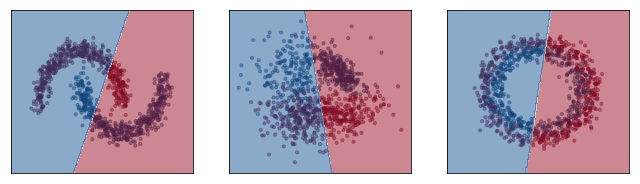

In [49]:
# Plot Data
n = len(data_list)
plt.figure(figsize=(15,3))
for i in range(n):
    X, y = data_list[i]
    ax = plt.subplot(1,4,i+1)
    
    # Fit model
    model.fit(X, y)
    
    # Plot Data
    plot_data(X, y, ax)
    
    # Create Meshgrid
    xx, yy, tmp = create_meshgrid(X)
    
    # Predict with meshgrid daat
    zz = model.predict(tmp)
    zz = zz.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, zz, alpha=0.5, cmap=plt.cm.RdBu)
    
    # Limit boundary
    plt.xlim(X[:,0].min()-.5, X[:,0].max()+.5)
    plt.ylim(X[:,1].min()-.5, X[:,1].max()+.5)

## KNeighborsClassifier

In [61]:
model = KNeighborsClassifier(n_neighbors=4)

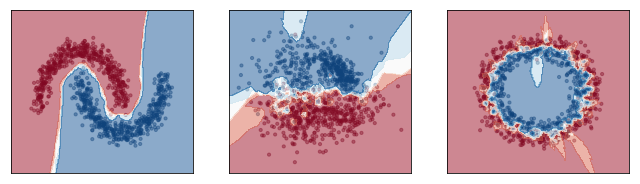

In [62]:
# Plot Data
n = len(data_list)
plt.figure(figsize=(15,3))
for i in range(n):
    X, y = data_list[i]
    ax = plt.subplot(1,4,i+1)
    
    # Fit model
    model.fit(X, y)
    
    # Plot Data
    plot_data(X, y, ax)
    
    # Create Meshgrid
    xx, yy, tmp = create_meshgrid(X)
    
    # Predict with meshgrid daat
    zz = model.predict_proba(tmp)[:,1]
    zz = zz.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, zz, alpha=0.5, cmap=plt.cm.RdBu)
    
    # Limit boundary
    plt.xlim(X[:,0].min()-.5, X[:,0].max()+.5)
    plt.ylim(X[:,1].min()-.5, X[:,1].max()+.5)